In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
%matplotlib inline
sns.set_style('darkgrid')
sns.set_context('talk')
plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
score_cols = ['math score', 'reading score', 'writing score']
features = ['gender', 'lunch', 'parental level of education', 'test preparation course']

In [6]:
df[score_cols].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


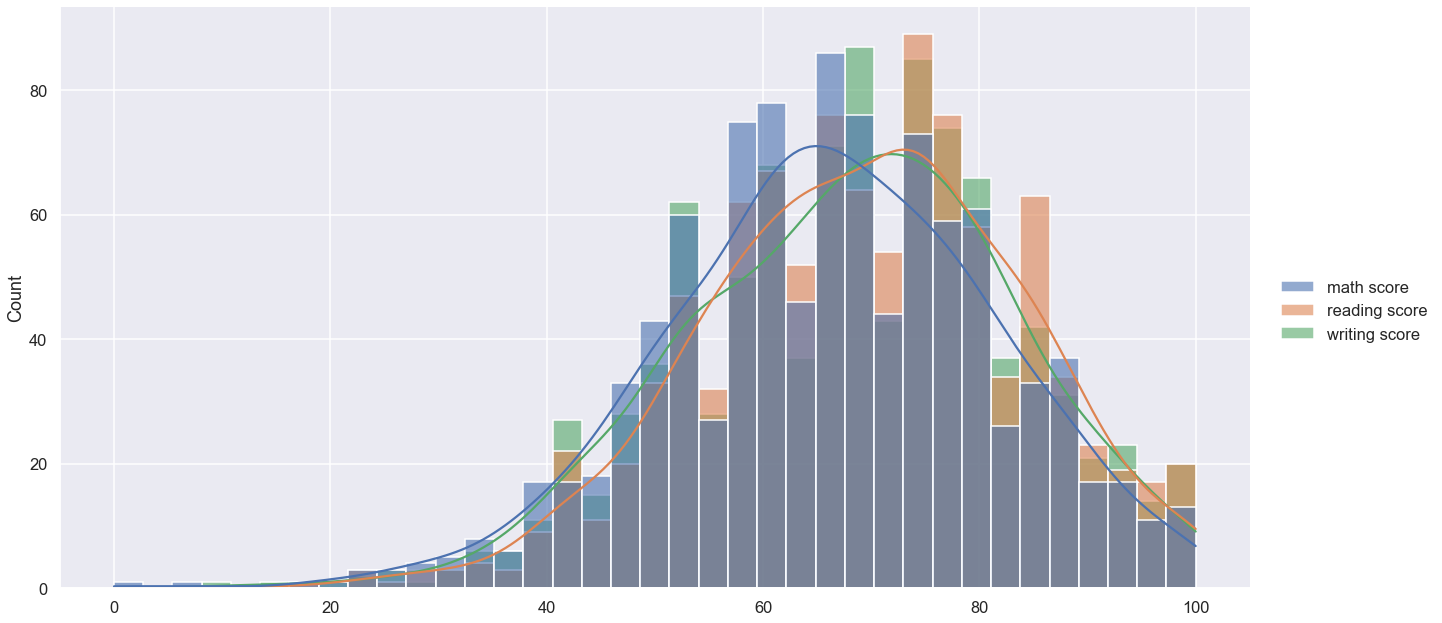

In [7]:
sns.displot(df[score_cols], height=9, aspect=2, kde=True, alpha=0.6);

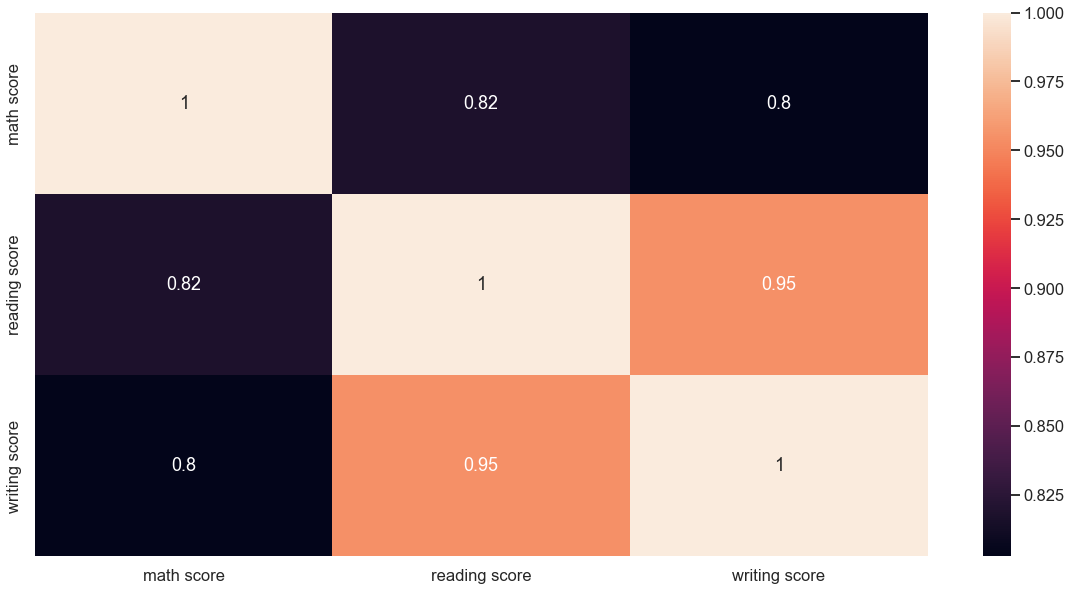

In [8]:
sns.heatmap(df[score_cols].corr(), annot=True);

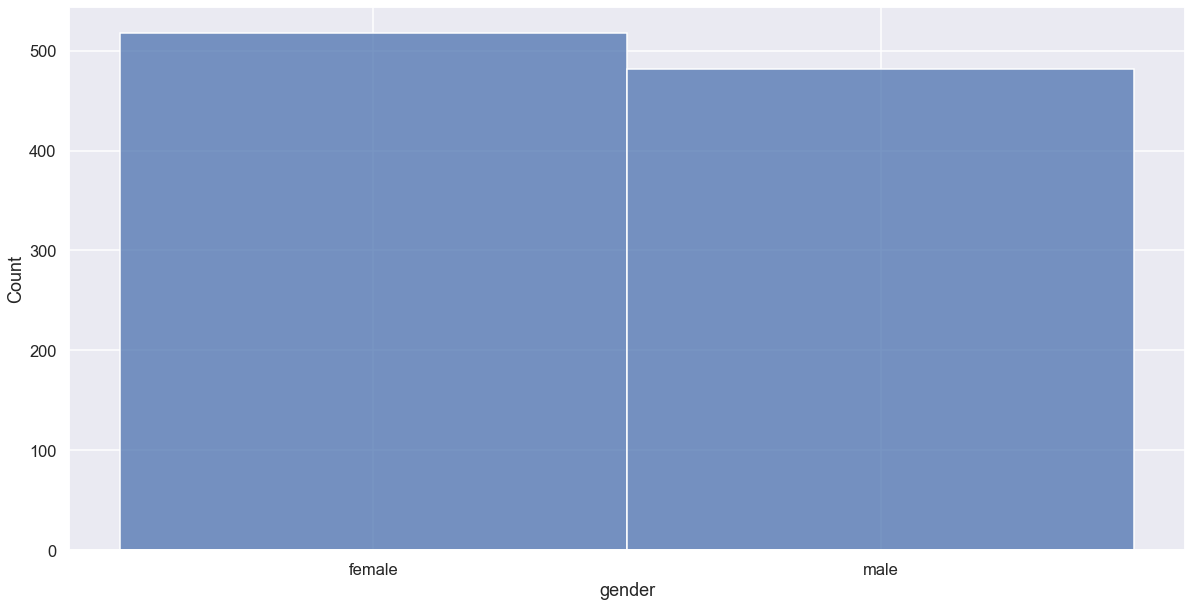

In [9]:
sns.histplot(df['gender']);

In [10]:
def plot_hist(df, x, cat_var, alpha=0.5, kde=True):
    sns.histplot(data=df, x=x, alpha=alpha, kde=kde, legend=True, hue=cat_var);
    for value in df[cat_var].unique():
        plt.axvline(df[df[cat_var] == value][x].mean(), linewidth=2, label="mean", alpha=0.8, color='black')
        plt.text(df[df[cat_var] == value][x].mean(), 2, value, rotation=90)

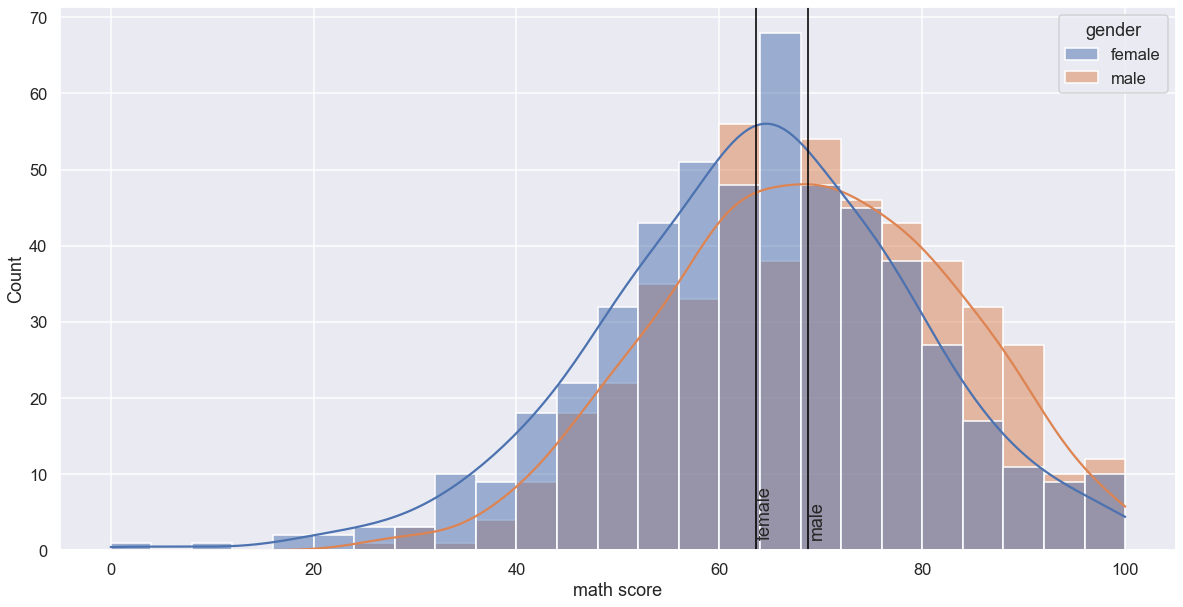

In [11]:
plot_hist(df, 'math score', 'gender')

In [12]:
df[df['gender'] == 'male']['math score'].mean() - df[df['gender'] == 'female']['math score'].mean()

5.095011134430216

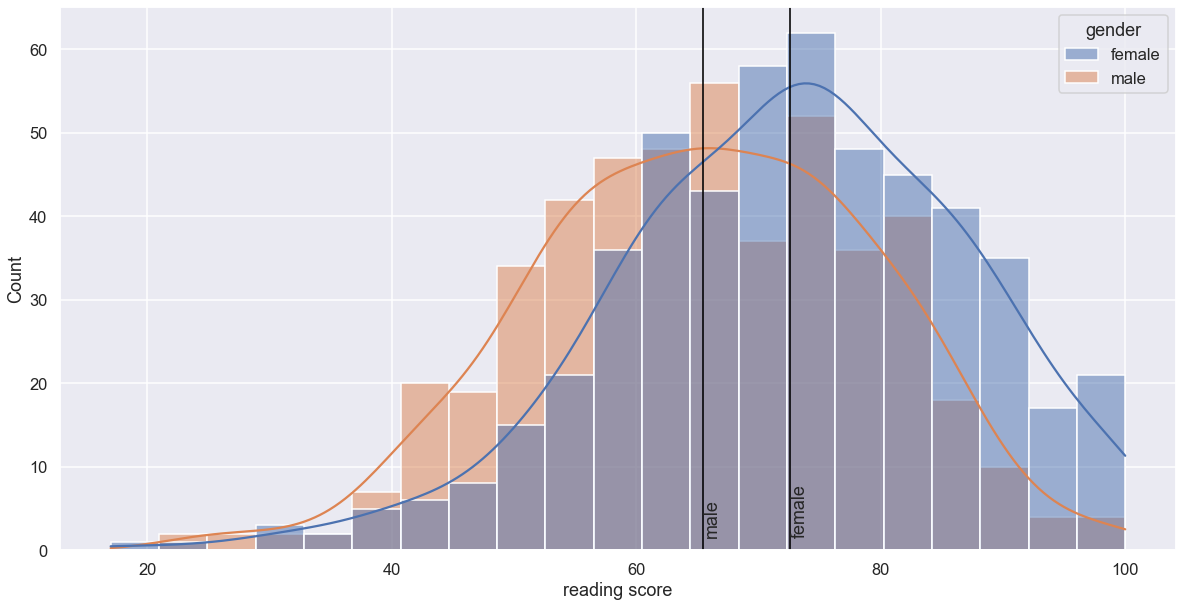

In [13]:
plot_hist(df, 'reading score', 'gender')

In [14]:
df[df['gender'] == 'male']['reading score'].mean() - df[df['gender'] == 'female']['reading score'].mean()

-7.135079062464953

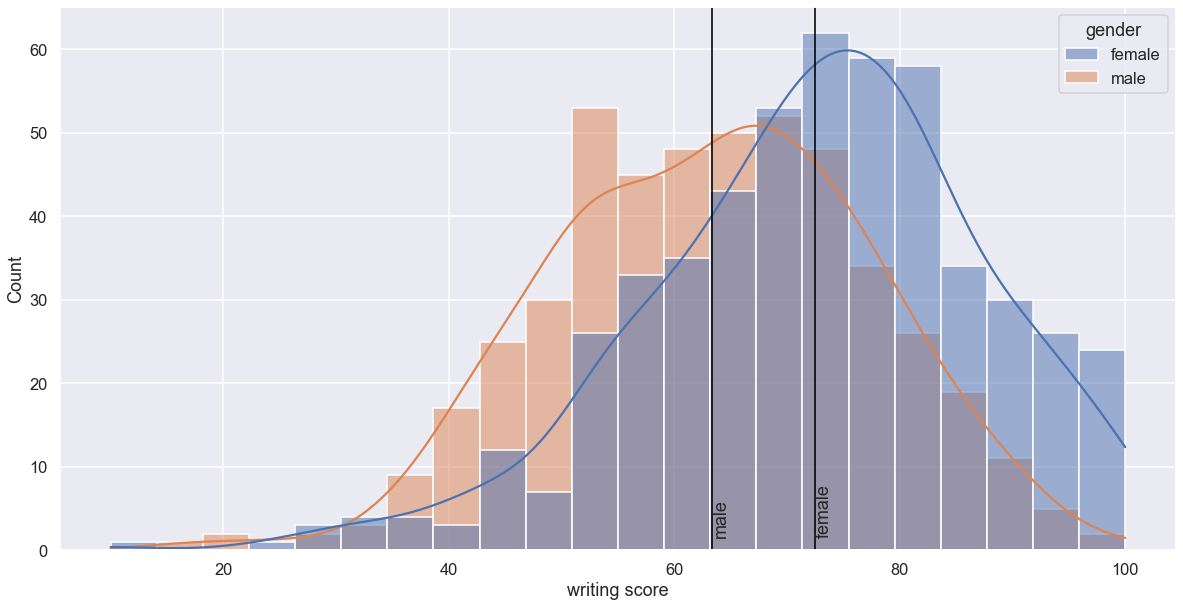

In [15]:
plot_hist(df, 'writing score', 'gender')

In [16]:
df[df['gender'] == 'male']['writing score'].mean() - df[df['gender'] == 'female']['writing score'].mean()

-9.155978147679384

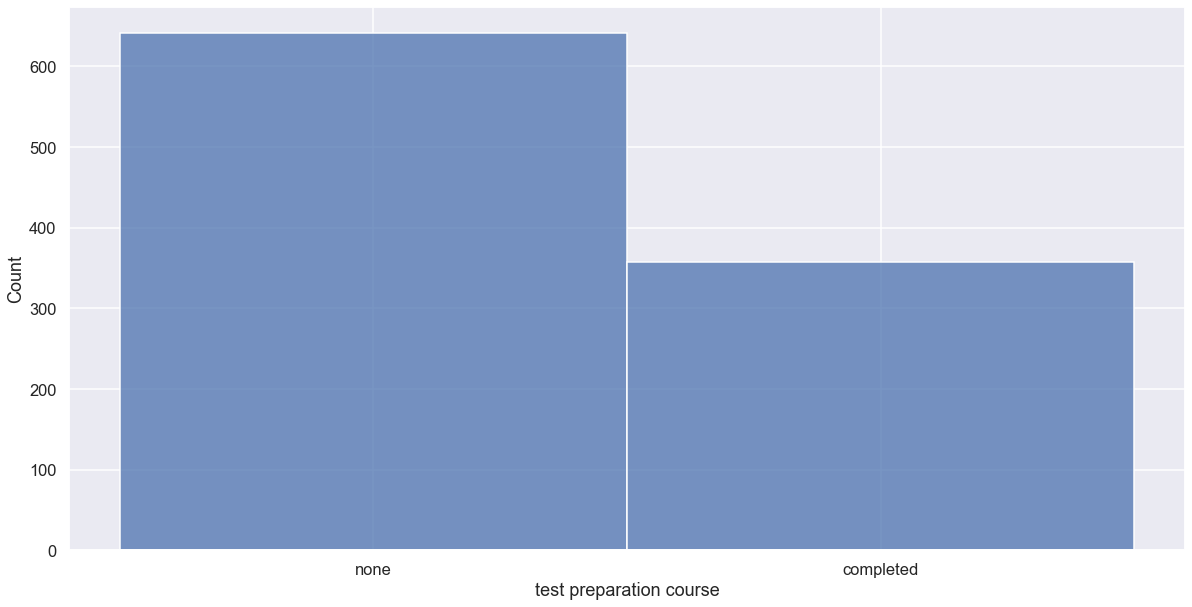

In [17]:
sns.histplot(df['test preparation course']);

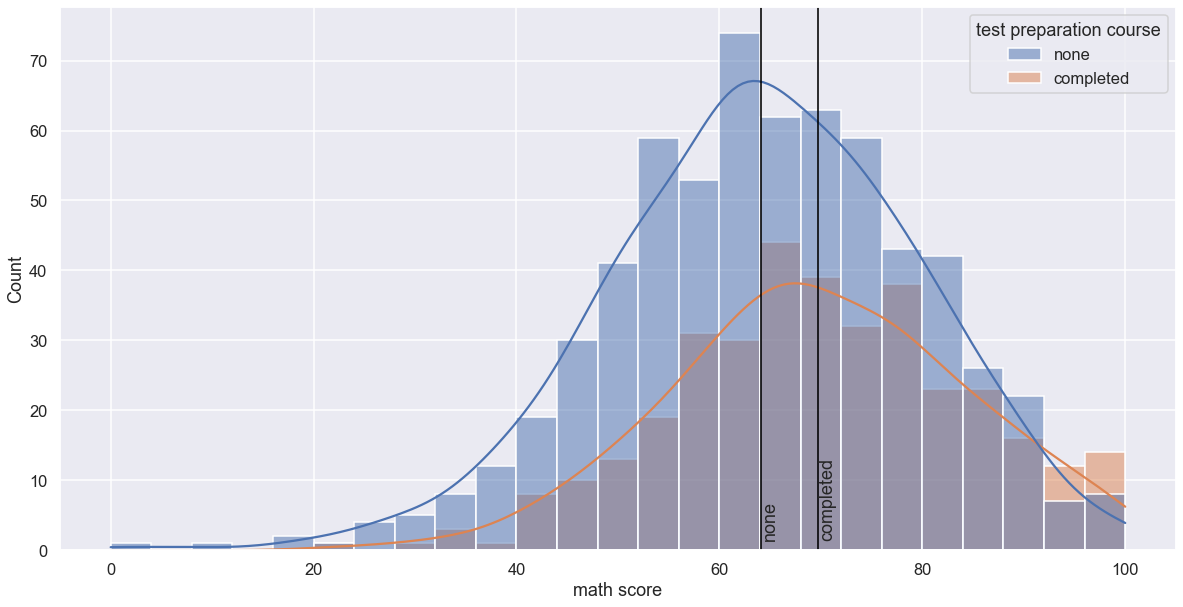

In [18]:
plot_hist(df, 'math score', 'test preparation course')

In [19]:
df[df['test preparation course'] == 'completed']['math score'].mean() - df[df['test preparation course'] == 'none']['math score'].mean()

5.617649106319291

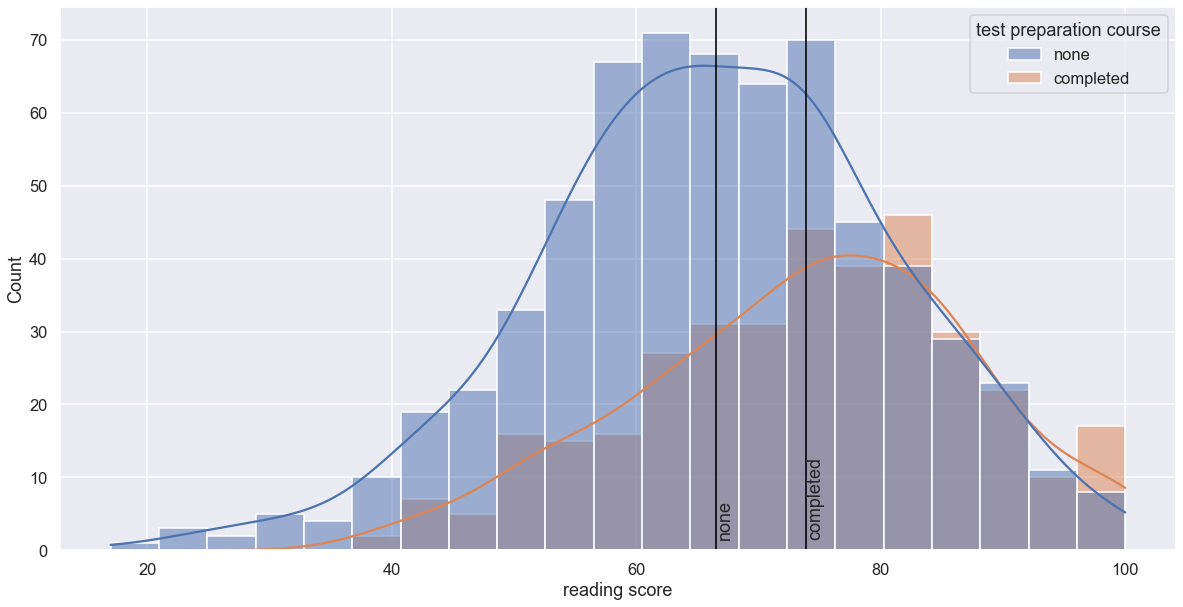

In [20]:
plot_hist(df, 'reading score', 'test preparation course')

In [21]:
df[df['test preparation course'] == 'completed']['reading score'].mean() - df[df['test preparation course'] == 'none']['reading score'].mean()

7.359586835830754

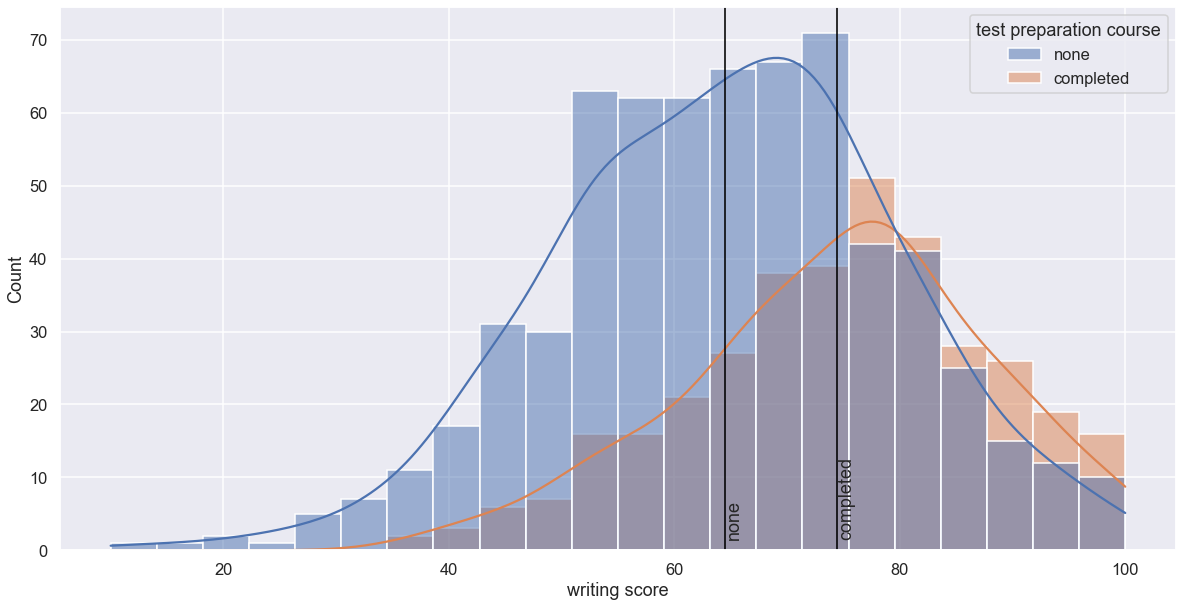

In [22]:
plot_hist(df, 'writing score', 'test preparation course')

In [23]:
df[df['test preparation course'] == 'completed']['writing score'].mean() - df[df['test preparation course'] == 'none']['writing score'].mean()

9.914321516211558

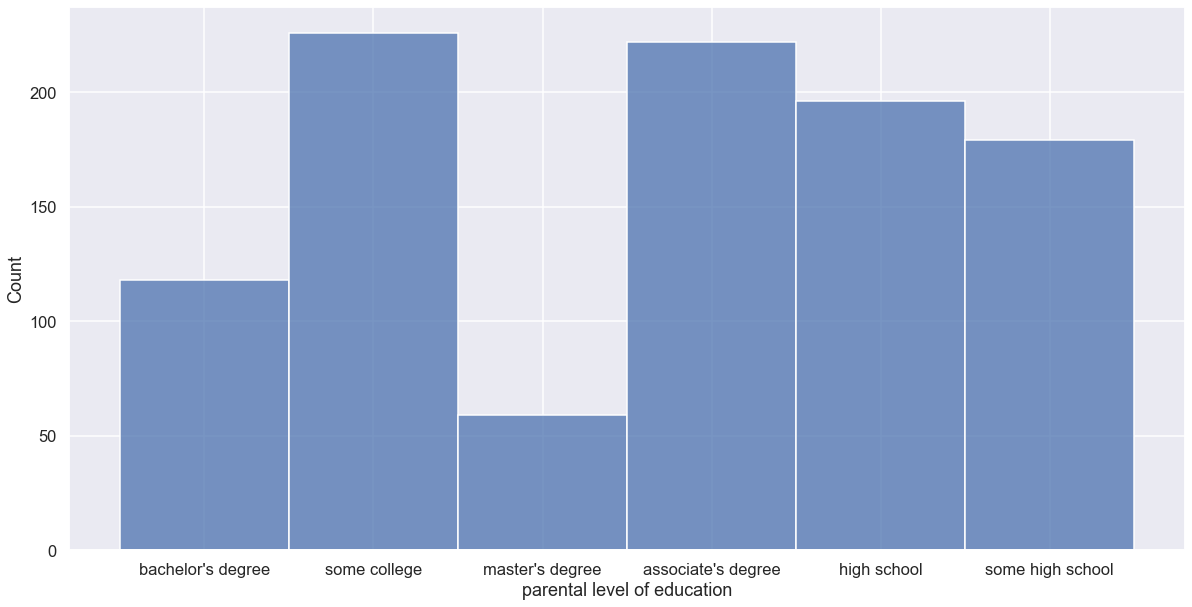

In [24]:
sns.histplot(df['parental level of education']);

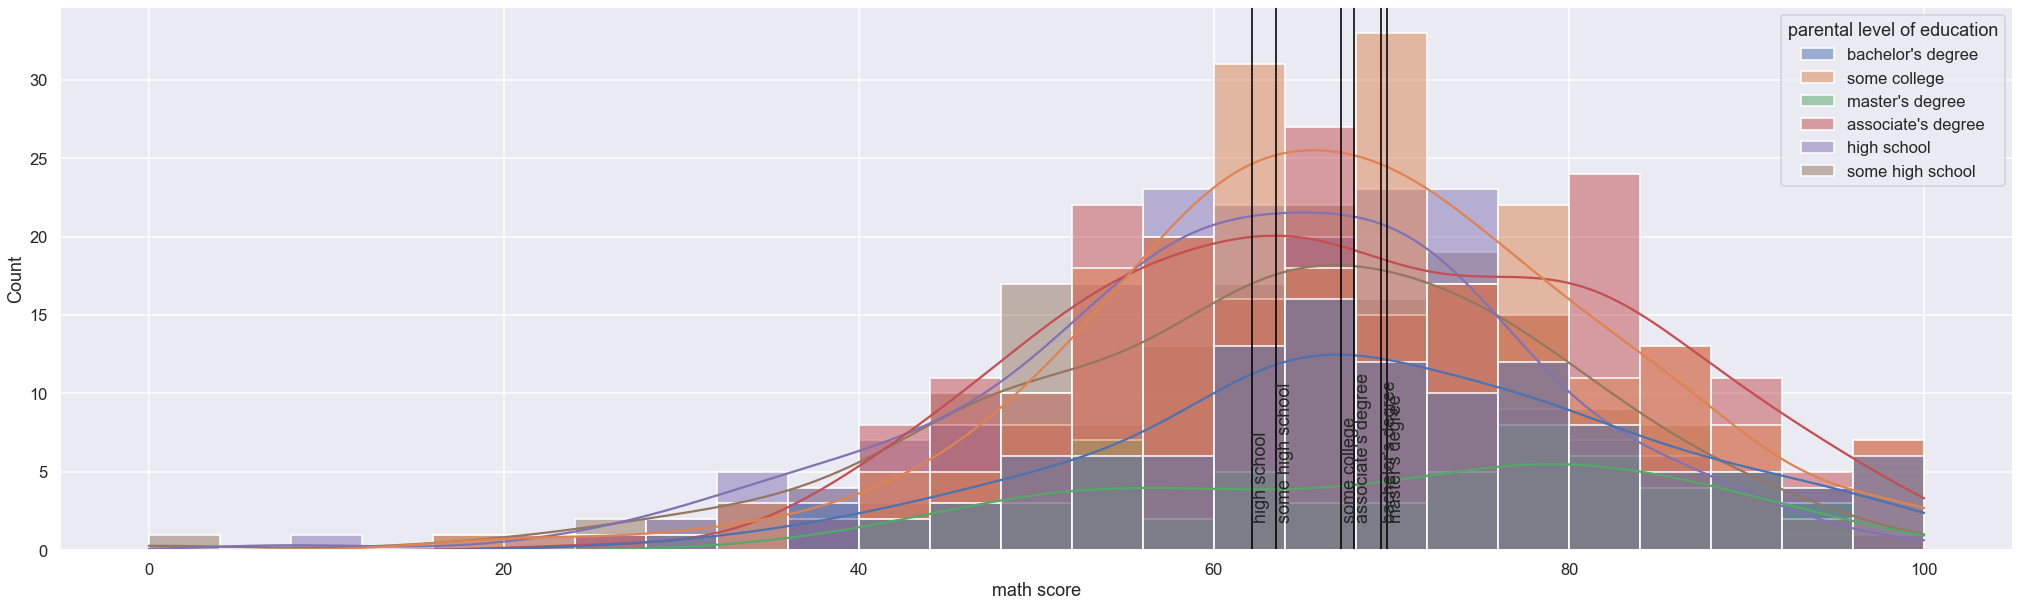

In [25]:
plt.figure(figsize=(35, 10))
plot_hist(df, 'math score', 'parental level of education')

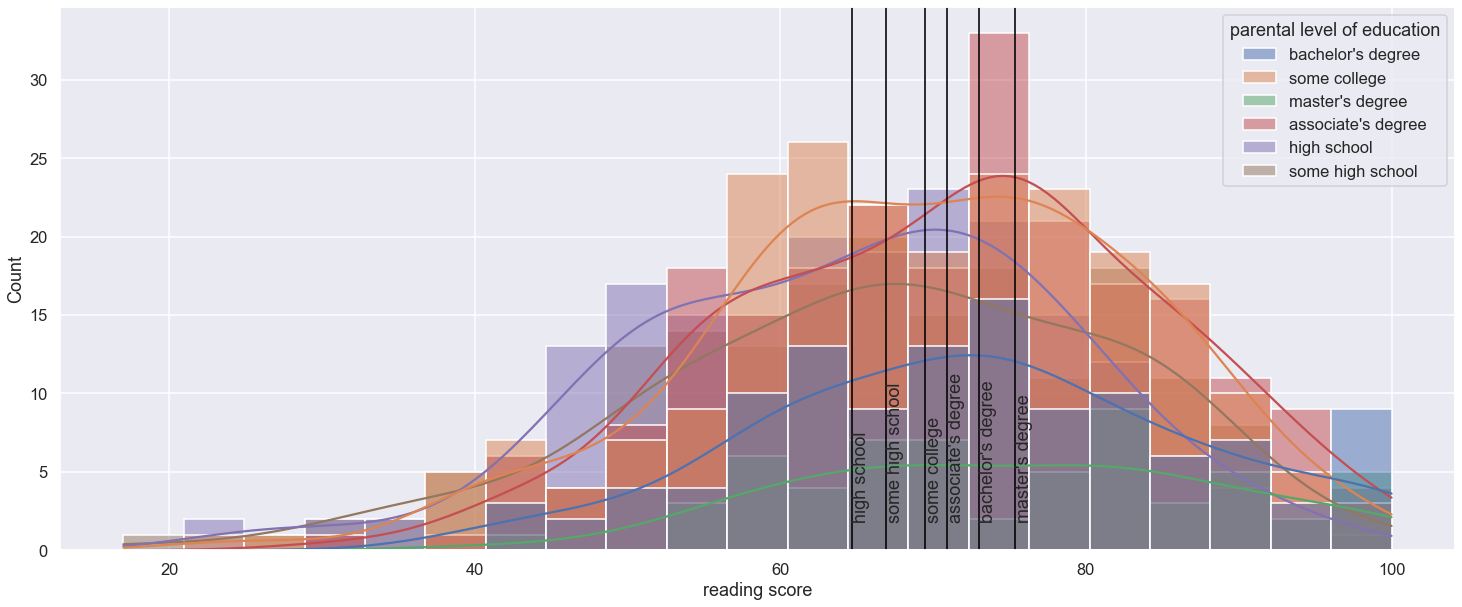

In [26]:
plt.figure(figsize=(25, 10))
plot_hist(df, 'reading score', 'parental level of education')

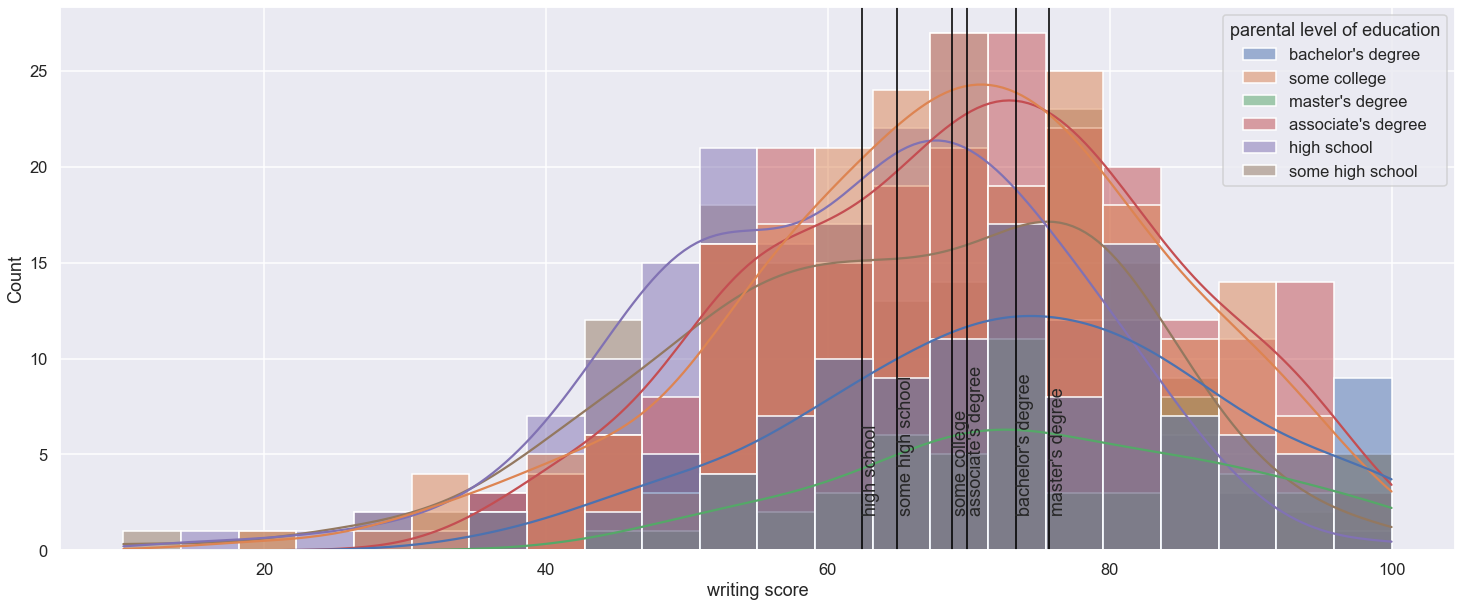

In [27]:
plt.figure(figsize=(25, 10))
plot_hist(df, 'writing score', 'parental level of education')

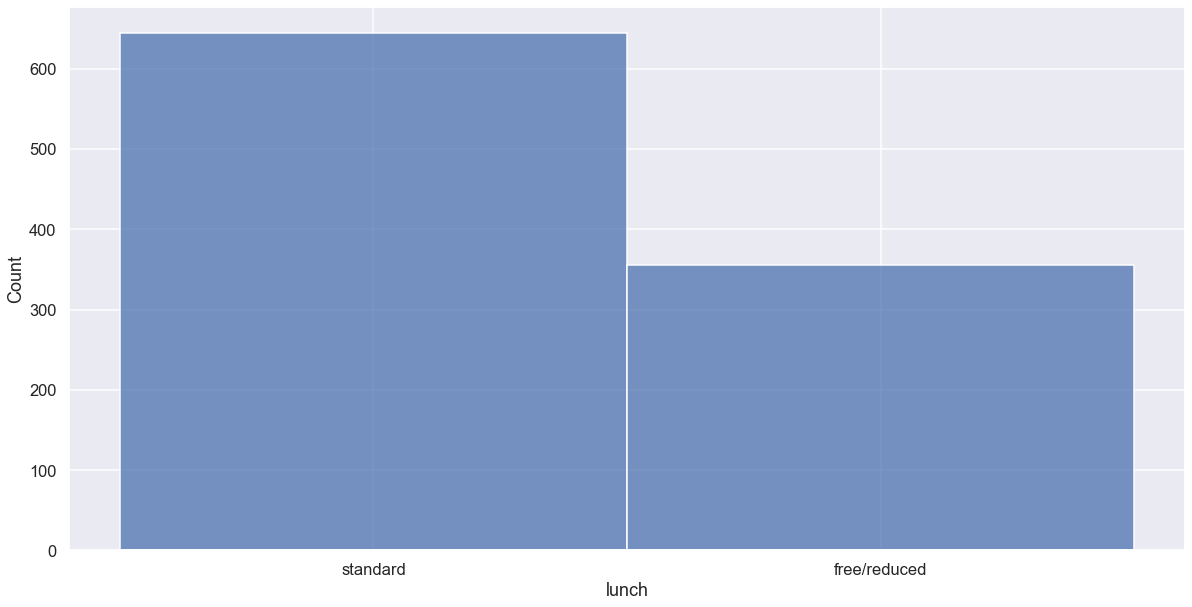

In [28]:
sns.histplot(df['lunch']);

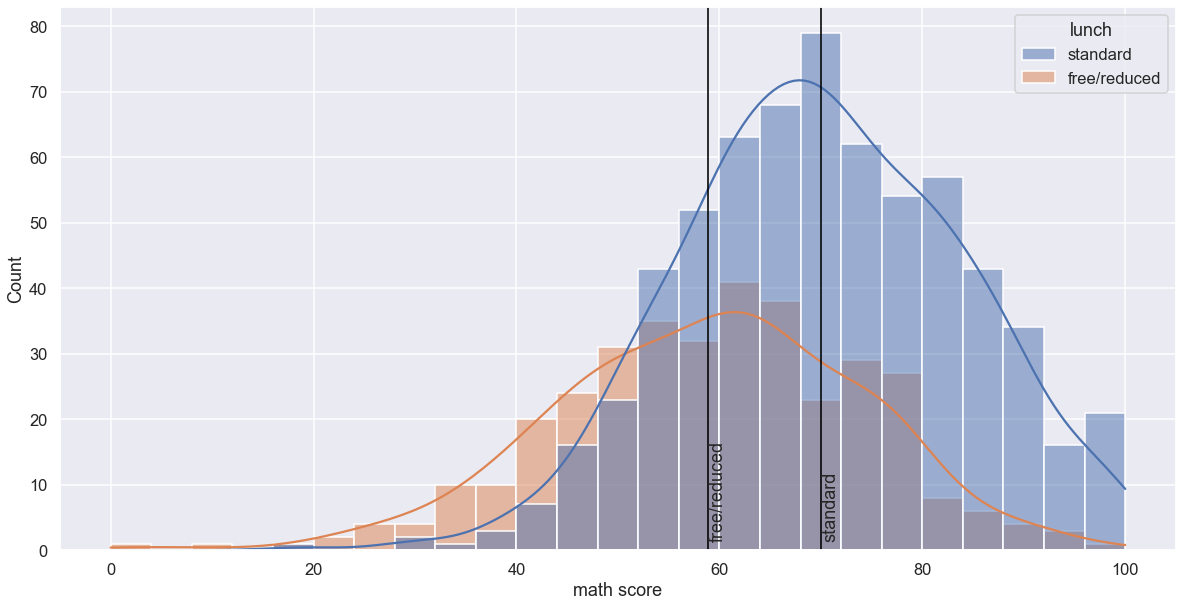

In [29]:
plot_hist(df, 'math score', 'lunch')

In [30]:
df[df['lunch'] == 'standard']['math score'].mean() - df[df['lunch'] == 'free/reduced']['math score'].mean()

11.112981766568396

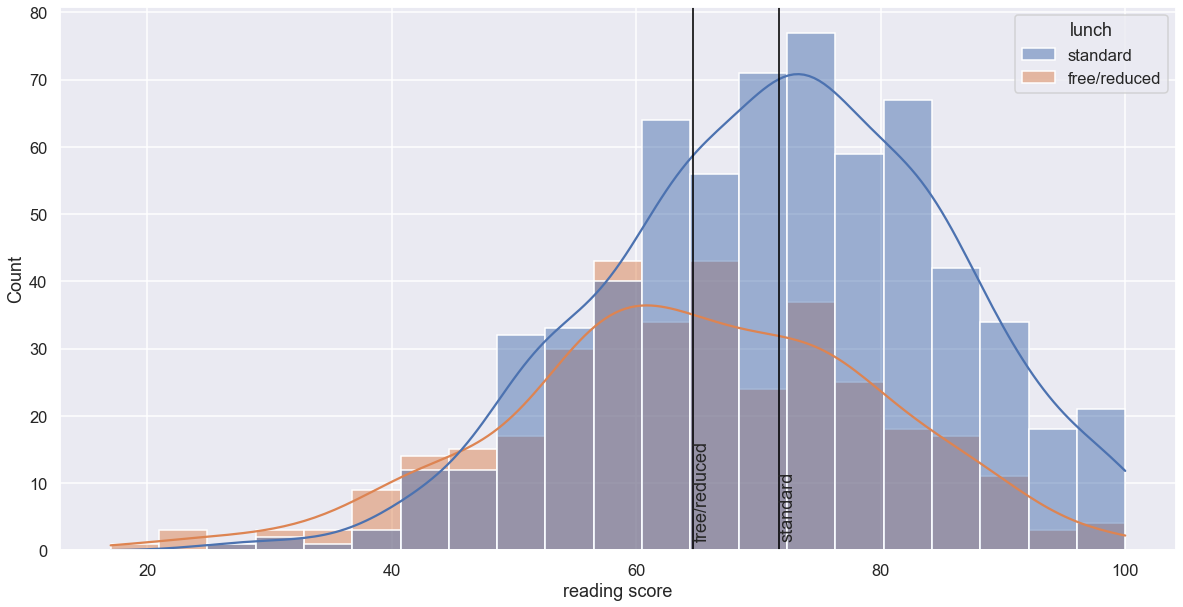

In [31]:
plot_hist(df, 'reading score', 'lunch')

In [32]:
df[df['lunch'] == 'standard']['reading score'].mean() - df[df['lunch'] == 'free/reduced']['reading score'].mean()

7.000742439130903

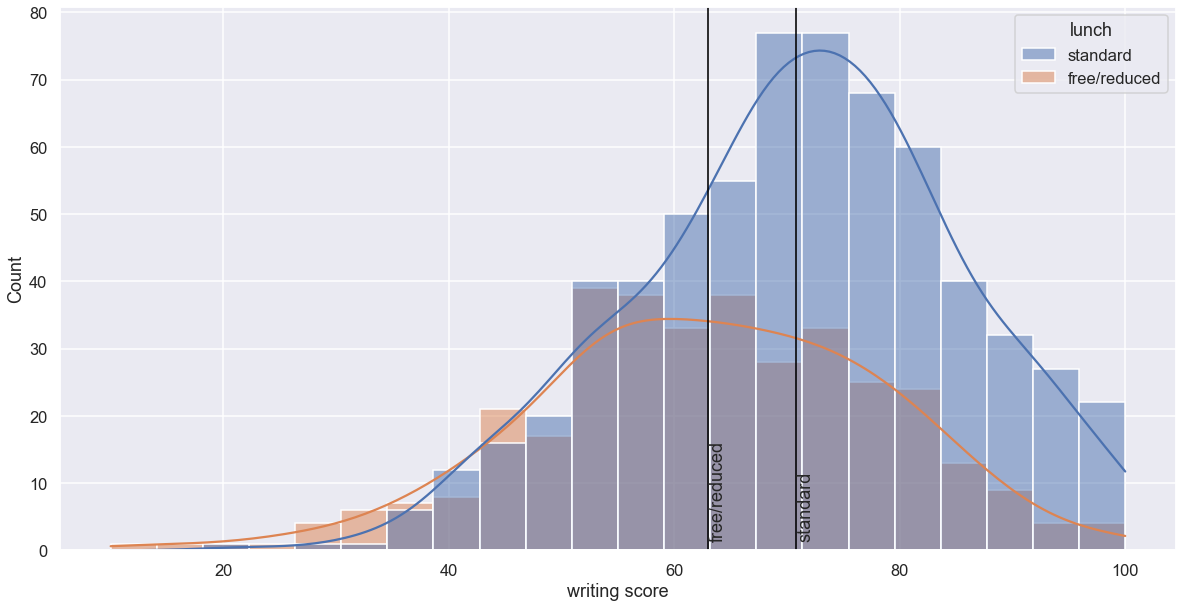

In [33]:
plot_hist(df, 'writing score', 'lunch')

In [34]:
df[df['lunch'] == 'standard']['writing score'].mean() - df[df['lunch'] == 'free/reduced']['writing score'].mean()

7.800720602685885

In [35]:
df = pd.read_csv('StudentsPerformance.csv')

In [36]:
df_dummy = pd.get_dummies(df)
df_dummy.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [37]:
check_male = df_dummy[df_dummy["gender_male"]==1]
check_female = df_dummy[df_dummy["gender_female"]==1]

check_master_degree = df_dummy[df_dummy["parental level of education_master's degree"]==1]
check_bachelor_degree = df_dummy[df_dummy["parental level of education_bachelor's degree"]==1]
check_associate_degree = df_dummy[df_dummy["parental level of education_associate's degree"]==1]
check_some_college = df_dummy[df_dummy["parental level of education_some college"]==1]
check_highschool = df_dummy[df_dummy["parental level of education_high school"]==1]
check_some_highschool = df_dummy[df_dummy["parental level of education_some high school"]==1]

check_lunch_free = df_dummy[df_dummy["lunch_free/reduced"]==1]
check_lunch_standard = df_dummy[df_dummy["lunch_standard"]==1]

check_course_yes = df_dummy[df_dummy["test preparation course_completed"]==1]
check_course_no = df_dummy[df_dummy["test preparation course_none"]==1]

In [38]:
male_math = check_male["math score"]
female_math = check_female["math score"]
master_degree_math = check_master_degree["math score"]
bachelor_degree_math = check_bachelor_degree["math score"]
associate_degree_math = check_associate_degree["math score"]
some_college_math = check_some_college["math score"]
highschool_math = check_highschool["math score"]
some_highschool_math = check_some_highschool["math score"]
lunch_free_math = check_lunch_free["math score"]
lunch_standard_math = check_lunch_standard["math score"]
course_yes_math = check_course_yes["math score"]
course_no_math = check_course_no["math score"]

In [39]:
male_reading = check_male["reading score"]
female_reading = check_female["reading score"]
master_degree_reading = check_master_degree["reading score"]
bachelor_degree_reading = check_bachelor_degree["reading score"]
associate_degree_reading = check_associate_degree["reading score"]
some_college_reading = check_some_college["reading score"]
highschool_reading = check_highschool["reading score"]
some_highschool_reading = check_some_highschool["reading score"]
lunch_free_reading = check_lunch_free["reading score"]
lunch_standard_reading = check_lunch_standard["reading score"]
course_yes_reading = check_course_yes["reading score"]
course_no_reading = check_course_no["reading score"]

In [40]:
male_writing = check_male["writing score"]
female_writing = check_female["writing score"]
master_degree_writing = check_master_degree["writing score"]
bachelor_degree_writing = check_bachelor_degree["writing score"]
associate_degree_writing = check_associate_degree["writing score"]
some_college_writing = check_some_college["writing score"]
highschool_writing = check_highschool["writing score"]
some_highschool_writing = check_some_highschool["writing score"]
lunch_free_writing = check_lunch_free["writing score"]
lunch_standard_writing = check_lunch_standard["writing score"]
course_yes_writing = check_course_yes["writing score"]
course_no_writing = check_course_no["writing score"]

In [41]:
male_all = []
female_all = []
master_degree_all = []
bachelor_degree_all = []
associate_degree_all = []
some_college_all = []
highschool_all = []
some_highschool_all = []
lunch_free_all = []
lunch_standard_all = []
course_yes_all = []
course_no_all = []

for i in male_math.index:
    temp = (male_math[i] + male_reading[i] + male_writing[i]) / 3
    male_all.append(temp)
    
for i in female_math.index:
    temp = (female_math[i] + female_reading[i] + female_writing[i]) / 3
    female_all.append(temp)
    
for i in master_degree_math.index:
    temp = (master_degree_math[i] + master_degree_reading[i] + master_degree_writing[i]) / 3
    master_degree_all.append(temp)
    
for i in bachelor_degree_math.index:
    temp = (bachelor_degree_math[i] + bachelor_degree_reading[i] + bachelor_degree_writing[i]) / 3
    bachelor_degree_all.append(temp)
    
for i in associate_degree_math.index:
    temp = (associate_degree_math[i] + associate_degree_reading[i] + associate_degree_writing[i]) / 3
    associate_degree_all.append(temp)
    
for i in some_college_math.index:
    temp = (some_college_math[i] + some_college_reading[i] + some_college_writing[i]) / 3
    some_college_all.append(temp)
    
for i in highschool_math.index:
    temp = (highschool_math[i] + highschool_reading[i] + highschool_writing[i]) / 3
    highschool_all.append(temp)
    
for i in some_highschool_math.index:
    temp = (some_highschool_math[i] + some_highschool_reading[i] + some_highschool_writing[i]) / 3
    some_highschool_all.append(temp)
    
for i in lunch_free_math.index:
    temp = (lunch_free_math[i] + lunch_free_reading[i] + lunch_free_writing[i]) / 3
    lunch_free_all.append(temp)
    
for i in lunch_standard_writing.index:
    temp = (lunch_standard_math[i] + lunch_standard_reading[i] + lunch_standard_writing[i]) / 3
    lunch_standard_all.append(temp)

for i in course_yes_writing.index:
    temp = (course_yes_math[i] + course_yes_reading[i] + course_yes_writing[i]) / 3
    course_yes_all.append(temp)
    
for i in course_no_writing.index:
    temp = (course_no_math[i] + course_no_reading[i] + course_no_writing[i]) / 3
    course_no_all.append(temp)

In [42]:
Two_sample_t_test_gender = stats.ttest_ind(male_all, female_all)
Anova_education = stats.f_oneway(master_degree_all, bachelor_degree_all, associate_degree_all, some_college_all, highschool_all, some_highschool_all)
Two_sample_t_test_lunch = stats.ttest_ind(lunch_free_all, lunch_standard_all)
Two_sample_t_test_course = stats.ttest_ind(course_yes_all, course_no_all)

In [43]:
Two_sample_t_test_gender = stats.ttest_ind(male_all, female_all)
Anova_education = stats.f_oneway(master_degree_all, bachelor_degree_all, associate_degree_all, some_college_all, highschool_all, some_highschool_all)
Two_sample_t_test_lunch = stats.ttest_ind(lunch_free_all, lunch_standard_all)
Two_sample_t_test_course = stats.ttest_ind(course_yes_all, course_no_all)

In [44]:
dictionary_pvalue = {'p-value':[Two_sample_t_test_gender[1], Anova_education[1], Two_sample_t_test_lunch[1], Two_sample_t_test_course[1]]}
dataframe_pvalue = pd.DataFrame(dictionary_pvalue, index=['Two sample t-test by gender', 'Anova by parental education', 'Two sample t-test by lunch', 'Two sample t-test by course'])
dataframe_pvalue

,p-value
Two sample t-test by gender,3.311974e-05
Anova by parental education,4.381046e-10
Two sample t-test by lunch,7.736792e-21
Two sample t-test by course,1.633780e-16
